# 7th

In [8]:

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier


# Load the breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create and train the BaggingClassifier
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)

bagging_clf.fit(X_train, y_train)

# Create and train the AdaBoostClassifier
ada_clf = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_clf.fit(X_train, y_train)

bagging_pred = bagging_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)

# Calculate metrics for BaggingClassifier
bagging_accuracy = accuracy_score(y_test, bagging_pred)
bagging_precision = precision_score(y_test, bagging_pred)
bagging_recall = recall_score(y_test, bagging_pred)

# Calculate metrics for AdaBoostClassifier
ada_accuracy = accuracy_score(y_test, ada_pred)
ada_precision = precision_score(y_test, ada_pred)
ada_recall = recall_score(y_test, ada_pred)

print("BaggingClassifier Performance:")
print(f"Accuracy: {bagging_accuracy:.3f}")
print(f"Precision: {bagging_precision:.3f}")
print(f"Recall: {bagging_recall:.3f}")
print("\nAdaBoostClassifier Performance:")
print(f"Accuracy: {ada_accuracy:.3f}")
print(f"Precision: {ada_precision:.3f}")
print(f"Recall: {ada_recall:.3f}")

BaggingClassifier Performance:
Accuracy: 0.956
Precision: 0.958
Recall: 0.972

AdaBoostClassifier Performance:
Accuracy: 0.974
Precision: 0.972
Recall: 0.986


# 8th


Confusion Matrix:
[[179   1]
 [ 11   9]]

Precision: 0.900
Recall: 0.450
F1-score: 0.600


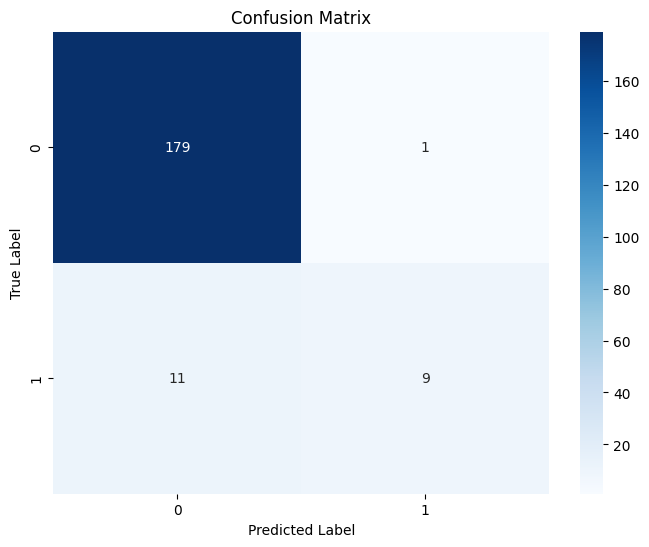

In [33]:

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

X_imb, y_imb = make_classification(
    n_samples=1000,
    n_classes=2,
    weights=[0.9, 0.1],  # 90% class 0, 10% class 1
    n_features=20,
    random_state=42
)

# Split the imbalanced data
X_train_imb, X_test_imb, y_train_imb, y_test_imb = train_test_split(
    X_imb, y_imb, test_size=0.2, random_state=42
)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_imb, y_train_imb)

# Make predictions
y_pred_imb = rf_clf.predict(X_test_imb)

# Calculate metrics
conf_matrix = confusion_matrix(y_test_imb, y_pred_imb)
precision = precision_score(y_test_imb, y_pred_imb)
recall = recall_score(y_test_imb, y_pred_imb)
f1 = f1_score(y_test_imb, y_pred_imb)

# Print results
print("Confusion Matrix:")
print(conf_matrix)
print(f"\nPrecision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")

# Display confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# 9th

[0]	validation_0-logloss:0.34287	validation_1-logloss:0.26986
[1]	validation_0-logloss:0.33806	validation_1-logloss:0.26675
[2]	validation_0-logloss:0.33287	validation_1-logloss:0.26319
[3]	validation_0-logloss:0.32843	validation_1-logloss:0.26030
[4]	validation_0-logloss:0.32362	validation_1-logloss:0.25698
[5]	validation_0-logloss:0.31899	validation_1-logloss:0.25378
[6]	validation_0-logloss:0.31501	validation_1-logloss:0.25117
[7]	validation_0-logloss:0.31066	validation_1-logloss:0.24815
[8]	validation_0-logloss:0.30685	validation_1-logloss:0.24576
[9]	validation_0-logloss:0.30277	validation_1-logloss:0.24291
[10]	validation_0-logloss:0.29925	validation_1-logloss:0.24060
[11]	validation_0-logloss:0.29532	validation_1-logloss:0.23792
[12]	validation_0-logloss:0.29151	validation_1-logloss:0.23531
[13]	validation_0-logloss:0.28781	validation_1-logloss:0.23292
[14]	validation_0-logloss:0.28423	validation_1-logloss:0.23059
[15]	validation_0-logloss:0.28111	validation_1-logloss:0.22916
[1

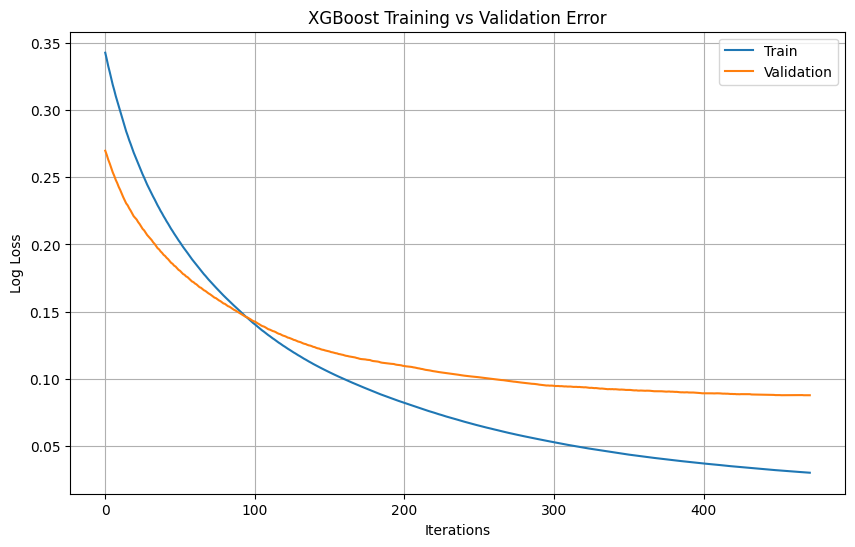

In [10]:

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Split training data into train and validation sets
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train_imb, y_train_imb, test_size=0.2, random_state=42
)

# Create and train XGBoost classifier with early stopping
xgb_clf = XGBClassifier(
    n_estimators=1000,
    learning_rate=0.01,
    random_state=42,
    early_stopping_rounds=10,
    eval_metric='logloss' 
)

# Fit model with evaluation set
eval_set = [(X_train_final, y_train_final), (X_val, y_val)]
xgb_clf.fit(
    X_train_final, 
    y_train_final,
    eval_set=eval_set,
    verbose=True
)

# Get the evaluation results
results = xgb_clf.evals_result()

# Plot training vs validation error
plt.figure(figsize=(10, 6))
plt.plot(results['validation_0']['logloss'], label='Train')  # Changed from mlogloss to logloss
plt.plot(results['validation_1']['logloss'], label='Validation')  # Changed from mlogloss to logloss
plt.xlabel('Iterations')
plt.ylabel('Log Loss')
plt.title('XGBoost Training vs Validation Error')
plt.legend()
plt.grid(True)
plt.show()

# 10th

In [11]:

from sklearn.ensemble import RandomForestClassifier
import joblib

# Create and train a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_imb, y_train_imb)
model_filename = 'random_forest_model.joblib'
joblib.dump(rf_model, model_filename)

loaded_rf_model = joblib.load(model_filename)

y_pred = loaded_rf_model.predict(X_test_imb)  # Use X_test_imb instead of X_test

# Calculate and print accuracy
accuracy = accuracy_score(y_test_imb, y_pred)  # Changed y_test to y_test_imb to match X_test_imb
print(f"Accuracy of loaded model: {accuracy:.4f}")

Accuracy of loaded model: 0.9400


# 11th

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Load the Pima Indians Diabetes dataset
diabetes_data = pd.read_csv('diabetes.csv')

# Split features and target
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

zero_not_accepted = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']

for column in zero_not_accepted:
    X[column] = X[column].replace(0, X[column].mean())

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred = gb_model.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Gradient Boosting Model Accuracy: {accuracy:.4f}")

Gradient Boosting Model Accuracy: 0.7662


# 18th

In [ ]:
# Base class
class Vehicle:
    def __init__(self, brand, color):  
        self.brand = brand
        self.color = color

    def display_info(self):
        print(f"Brand: {self.brand}, Color: {self.color}")

# Derived class
class Car(Vehicle):
    def __init__(self, brand, color, model): 
        super().__init__(brand, color) 
        self.model = model

    def display_car_info(self):
        self.display_info()  # Call method from base class
        print(f"Model: {self.model}")

# Example usage
my_car = Car("Toyota", "Red", "Corolla")
my_car.display_car_info()

Brand: Toyota, Color: Red
Model: Corolla


# 19th

In [32]:
class Student:
    def __init__(self, name):
        self.name = name
        self.__marks = []  # Private attribute
        
    def add_mark(self, mark):
        if 0 <= mark <= 100:  # Data validation
            self.__marks.append(mark)
        else:
            print("Invalid mark. Please enter a value between 0 and 100")
            
    def get_average(self):
        if len(self.__marks) > 0:
            return sum(self.__marks) / len(self.__marks)
        return 0
    
    def display_marks(self):
        print(f"Student: {self.name}")
        print(f"Marks: {self.__marks}")

# Example usage
student = Student("John")
student.add_mark(85)
student.add_mark(92)
student.add_mark(78)
student.display_marks()
print(f"Average: {student.get_average():.2f}")


Student: John
Marks: [85, 92, 78]
Average: 85.00


# 21th

In [30]:

    
    class Father:
        def __init__(self, father_name, father_age):
            self.father_name = father_name
            self.father_age = father_age

        def show_father_info(self):
            print(f"Father's Name: {self.father_name}, Age: {self.father_age}")

    # Base class Mother
    class Mother:
        def __init__(self, mother_name, mother_age):
            self.mother_name = mother_name
            self.mother_age = mother_age

        def show_mother_info(self):
            print(f"Mother's Name: {self.mother_name}, Age: {self.mother_age}")

    # Derived class Child inheriting from Father and Mother
    class Child(Father, Mother):
        def __init__(self, father_name, father_age, mother_name, mother_age, child_name, child_age):
            Father.__init__(self, father_name, father_age)
            Mother.__init__(self, mother_name, mother_age)
            self.child_name = child_name
            self.child_age = child_age

        def show_child_info(self):
            print(f"Child's Name: {self.child_name}, Age: {self.child_age}")
            # Access attributes from both parents
            print(f"Father: {self.father_name}, Mother: {self.mother_name}")

    # Example usage
    child = Child("Raj", 45, "Meena", 42, "Rohan", 10)
    child.show_child_info()
    child.show_father_info()
    child.show_mother_info()


Child's Name: Rohan, Age: 10
Father: Raj, Mother: Meena
Father's Name: Raj, Age: 45
Mother's Name: Meena, Age: 42
